## 20_SMA

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

pd.options.mode.chained_assignment = None

In [37]:
s = yf.Ticker("TSLA")

In [38]:
s

yfinance.Ticker object <TSLA>

In [39]:
df = s.history(period='300d', interval='1d', rounding=True)

In [40]:
df = df.iloc[:,0:4]

<AxesSubplot:xlabel='Date'>

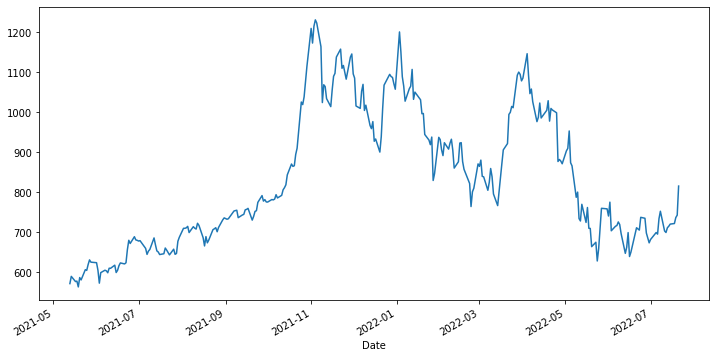

In [41]:
df['Close'].plot(figsize = (12,6))

In [42]:
def moving_average(df, period):
    sma = df['Close'].rolling(window = period).mean()
    return sma

In [43]:
sma_20 = moving_average(df, 20)

In [44]:
df['20_SMA'] = sma_20

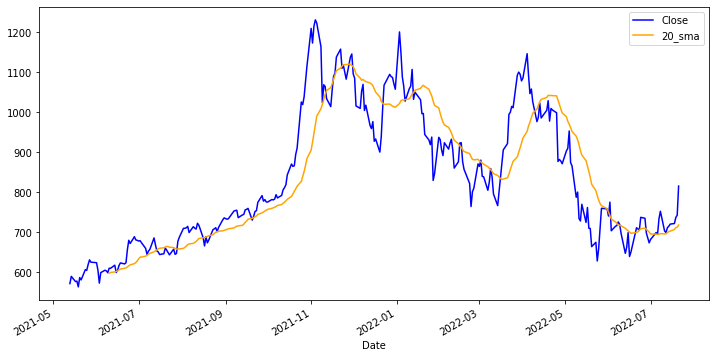

In [45]:
df['Close'].plot(c = 'blue', xlabel = 'Price', label ='Close', figsize = (12,6))
sma_20.plot(c = 'orange', label='20_sma')
plt.legend()


In [46]:
df

,Open,High,Low,Close,20_SMA
Date,,,,,
2021-05-13,601.54,606.46,559.65,571.69,NaN
2021-05-14,583.41,592.87,570.46,589.74,NaN
2021-05-17,575.55,589.73,561.20,576.83,NaN
2021-05-18,568.00,596.25,563.38,577.87,NaN
2021-05-19,552.55,566.21,546.98,563.46,NaN
...,...,...,...,...,...
2022-07-15,720.00,730.87,710.67,720.20,702.6765
2022-07-18,734.81,751.55,718.81,721.64,706.7935
2022-07-19,735.00,741.42,710.93,736.59,711.1090


## Strategy for 20 sma

As long as the stock price is above the 20_sma, the bullishness persists. We will always witness time correction or price correction due to elastic nature of the stock prices. The bearishness of a stock implies that that the stock price is below 20_sma.

## Stochastic Oscillator

In [48]:
def stochastic_oscillator(df, period, d):

    df['period_low'] = df['Low'].rolling(window = period, min_periods=1).min().round(2)
    df['period_high'] = df['High'].rolling(window = period, min_periods=1).max().round(2)
    df['K%'] = (((df['Close'] - df['period_low'])/(df['period_high'] - df['period_low']))*100).round(2)
    df['D%'] = df['K%'].rolling(window = d, min_periods=1).mean().round(2)
    
    return df

In [49]:
df = stochastic_oscillator(df, 14,3)

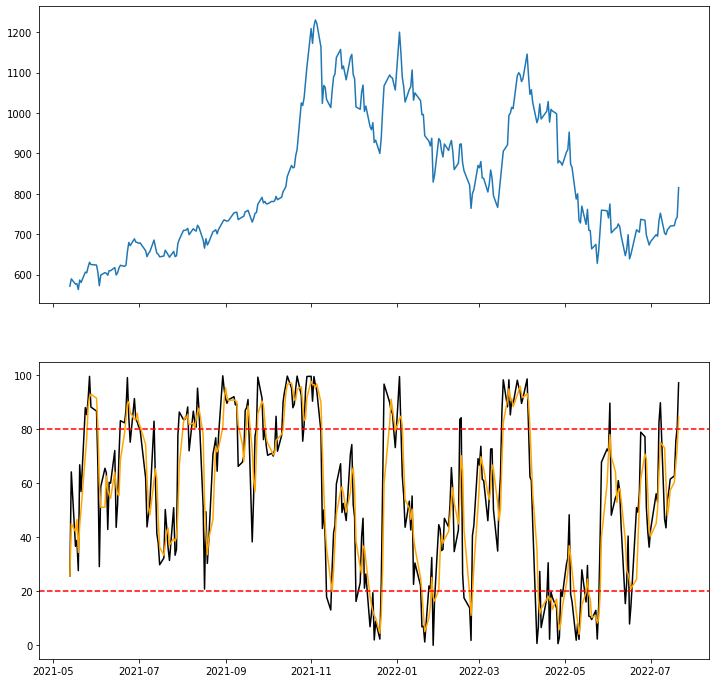

In [50]:
fig, ax = plt.subplots(2,1 ,sharex = 'col', squeeze=False, figsize=(12,12))
ax[0][0].plot(df['Close'])
ax[1][0].plot(df['K%'], c = 'black')
ax[1][0].plot(df['D%'], c = 'orange')
ax[1][0].axhline(y = 20, c = 'red', linestyle = '--')
ax[1][0].axhline(y = 80, c = 'red', linestyle = '--')

## Strategy for Stochastic Oscillator

This is a momentum indicator which has normalised/decompressed the prices. Above level 80 and below level 20 resemble the region of overbought and oversold respectively. if signal line (yellow) crosses the black line from below, its a buy signal. Whereas, if it crosses from above, its a sell signal. Crossovers at the extreme regions are important and result in better returns. 

## SuperTrend

### We need to make ATR

In [51]:
df= df.drop(columns=['period_low', 'period_high'])

In [59]:
df = df.drop(columns=['K%', 'D%'])

In [61]:
df

,Open,High,Low,Close,20_SMA,parameter1,parameter2,parameter3,TrueRange,average_true_range,Up,Down,supertrend
Date,,,,,,,,,,,,,
2021-05-13,601.54,606.46,559.65,571.69,NaN,46.81,NaN,NaN,NaN,NaN,NaN,NaN,True
2021-05-14,583.41,592.87,570.46,589.74,NaN,22.41,21.18,1.23,21.18,NaN,NaN,NaN,True
2021-05-17,575.55,589.73,561.20,576.83,NaN,28.53,0.01,28.54,28.54,NaN,NaN,NaN,True
2021-05-18,568.00,596.25,563.38,577.87,NaN,32.87,19.42,13.45,19.42,NaN,NaN,NaN,True
2021-05-19,552.55,566.21,546.98,563.46,NaN,19.23,11.66,30.89,30.89,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,720.00,730.87,710.67,720.20,702.6765,20.20,15.93,4.27,15.93,27.575,768.409,NaN,False
2022-07-18,734.81,751.55,718.81,721.64,706.7935,32.74,31.35,1.39,31.35,28.983,768.409,NaN,False
2022-07-19,735.00,741.42,710.93,736.59,711.1090,30.49,19.78,10.71,19.78,27.632,768.409,NaN,False


In [62]:
def average_true_range(df, period):
    df['parameter1'] = (df['High'] - df['Low'])
    df['parameter2'] = np.abs(df['High'] - df['Close'].shift(1))
    df['parameter3'] = np.abs(df['Low'] - df['Close'].shift(1))
    df_ = df.iloc[:,5:8]
    df['TrueRange'] = df_.max(axis = 1, skipna = False)
    df['average_true_range'] = df['TrueRange'].rolling(period).mean()
    
    return df

In [63]:
df = average_true_range(df,10)

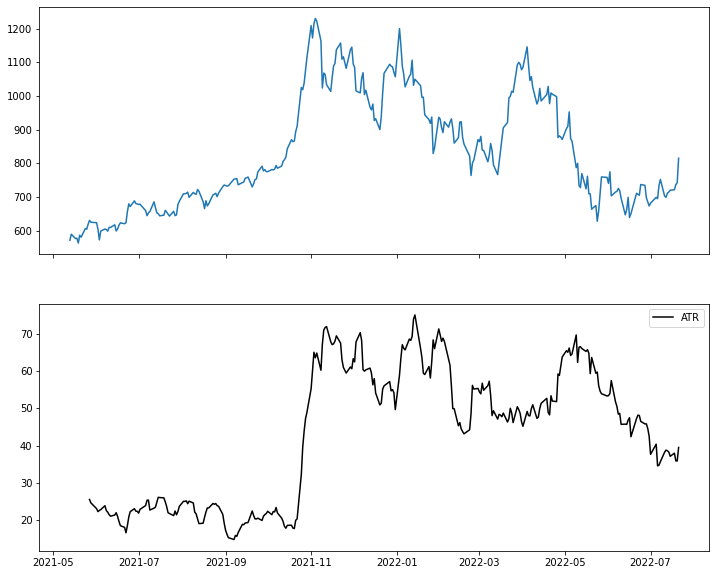

In [64]:
fig, ax = plt.subplots(nrows = 2, ncols = 1,squeeze = False, figsize = (12,10),  sharex = 'col')
ax[0][0].plot(df['Close'])

ax[1][0].plot(df['average_true_range'], c='black', label = 'ATR')
plt.legend()

### time for supertrend

In [65]:
def Supertrend(df, multiplier):
    
    hl2 = (df['High'] + df['Low']) / 2
  
    df['Up'] = hl2 + (multiplier * df['average_true_range'])
    df['Down'] = hl2 - (multiplier * df['average_true_range'])
    
    df['supertrend'] = [True] * len(df)
    
    for i in range(1, len(df.index)):
        curr, prev = i, i-1
        
        if df['Close'][curr] > df['Up'][prev]:
            df['supertrend'][curr] = True
        elif df['Close'][curr] < df['Down'][prev]:
            df['supertrend'][curr] = False
        else:
            df['supertrend'][curr] = df['supertrend'][prev]
            
## to make it not same as atr trailing line
            if df['supertrend'][curr] == True and df['Down'][curr] < df['Down'][prev]:
                df['Down'][curr] = df['Down'][prev]
            if df['supertrend'][curr] == False and df['Up'][curr] > df['Up'][prev]:
                df['Up'][curr] = df['Up'][prev]

## to break the color line on given situation
        if df['supertrend'][curr] == True:
            df['Up'][curr] = np.nan
        else:
            df['Down'][curr] = np.nan
    
    return df

In [66]:
df = Supertrend(df, 3)

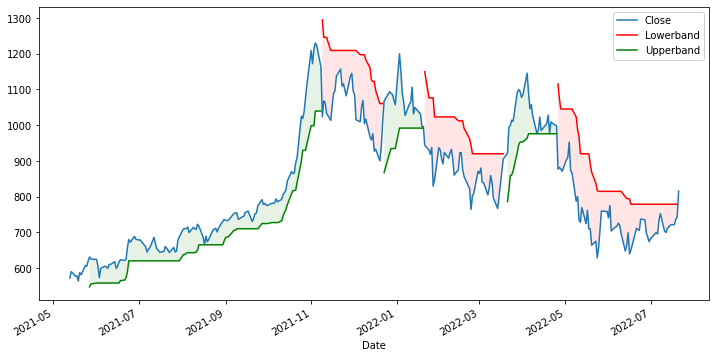

In [67]:
df['Close'].plot(label='Close', figsize = (12,6))
df['Up'].plot(c = 'r', label = 'Lowerband' , figsize = (12,6))
df['Down'].plot(c = 'g', label = 'Upperband' , figsize = (12,6))

plt.fill_between(df.index, df['Up'], df['Close'], facecolor = 'red', alpha = 0.1)
plt.fill_between(df.index, df['Down'], df['Close'], facecolor = 'green', alpha = 0.1)

plt.legend()

In [69]:
df = df.drop(columns= ['parameter1', 'parameter2','parameter3', 'TrueRange'])

In [70]:
df

,Open,High,Low,Close,20_SMA,average_true_range,Up,Down,supertrend
Date,,,,,,,,,
2021-05-13,601.54,606.46,559.65,571.69,NaN,NaN,NaN,NaN,True
2021-05-14,583.41,592.87,570.46,589.74,NaN,NaN,NaN,NaN,True
2021-05-17,575.55,589.73,561.20,576.83,NaN,NaN,NaN,NaN,True
2021-05-18,568.00,596.25,563.38,577.87,NaN,NaN,NaN,NaN,True
2021-05-19,552.55,566.21,546.98,563.46,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...
2022-07-15,720.00,730.87,710.67,720.20,702.6765,37.151,778.456,NaN,False
2022-07-18,734.81,751.55,718.81,721.64,706.7935,37.992,778.456,NaN,False
2022-07-19,735.00,741.42,710.93,736.59,711.1090,35.947,778.456,NaN,False


## Strategy for SuperTrend

ATR is a volatility check indicator. Although, this is indicator is not a reliable one. when the stocks lie in the green region, its a buy, otherwise sell. 

## Three White Soldiers

In [71]:
def Three_white_soldiers(df):
    
    high = df['High']
    low = df['Low']
    close = df['Close']
    open_ = df['Open']
    
    df['3whiteSoldier'] = ''
    
    for i in range(1, len(df.index)-1):
        current = i
        prev = i-1
        next_ = i+1

        if(open_[current] <= close[prev] and close[current] > high[prev]):
            if(open_[next_] <= close[current] and close[next_]> high[current]):
                df['3whiteSoldier'][current] = True
               

            else:
                df['3whiteSoldier'][current] = False
                
        else:
            df['3whiteSoldier'][current] = False
            
        
    return df 

In [72]:
df = Three_white_soldiers(df)

In [73]:
df

,Open,High,Low,Close,20_SMA,average_true_range,Up,Down,supertrend,3whiteSoldier
Date,,,,,,,,,,
2021-05-13,601.54,606.46,559.65,571.69,NaN,NaN,NaN,NaN,True,
2021-05-14,583.41,592.87,570.46,589.74,NaN,NaN,NaN,NaN,True,False
2021-05-17,575.55,589.73,561.20,576.83,NaN,NaN,NaN,NaN,True,False
2021-05-18,568.00,596.25,563.38,577.87,NaN,NaN,NaN,NaN,True,False
2021-05-19,552.55,566.21,546.98,563.46,NaN,NaN,NaN,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...
2022-07-15,720.00,730.87,710.67,720.20,702.6765,37.151,778.456,NaN,False,False
2022-07-18,734.81,751.55,718.81,721.64,706.7935,37.992,778.456,NaN,False,False
2022-07-19,735.00,741.42,710.93,736.59,711.1090,35.947,778.456,NaN,False,False


In [75]:
df['3whiteSoldier'].value_counts()

False    296
           2
True       2
Name: 3whiteSoldier, dtype: int64

## Three White Soldiers

Reversal of the existing trend is indicated by this pattern. If a downtrend is followed by this pattern, the downtrend has reversed to uptrend. But again, it is too late if you wait till the pattern completely shows up. This is because such patterns have candles of large bodies. 

### we have 2 such patterns spotted in the period of 300days

# Morning Star

In [76]:
def morning_star(df):
    df['morning_star'] = ''
    for i in range(2,len(df.index)):
        if(df.iloc[i,3] > df.iloc[i,0] and df.iloc[i,0] > df.iloc[i-1, 3] and df.iloc[i-1,3] > df.iloc[i-1,0] and df.iloc[i-1,3] < df.iloc[i-2,3]):
            df['morning_star'][i] = True
            
        else:
            df['morning_star'][i] = False
            
    return df

In [77]:
df = morning_star(df)

In [78]:
df

,Open,High,Low,Close,20_SMA,average_true_range,Up,Down,supertrend,3whiteSoldier,morning_star
Date,,,,,,,,,,,
2021-05-13,601.54,606.46,559.65,571.69,NaN,NaN,NaN,NaN,True,,
2021-05-14,583.41,592.87,570.46,589.74,NaN,NaN,NaN,NaN,True,False,
2021-05-17,575.55,589.73,561.20,576.83,NaN,NaN,NaN,NaN,True,False,False
2021-05-18,568.00,596.25,563.38,577.87,NaN,NaN,NaN,NaN,True,False,False
2021-05-19,552.55,566.21,546.98,563.46,NaN,NaN,NaN,NaN,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,720.00,730.87,710.67,720.20,702.6765,37.151,778.456,NaN,False,False,False
2022-07-18,734.81,751.55,718.81,721.64,706.7935,37.992,778.456,NaN,False,False,False
2022-07-19,735.00,741.42,710.93,736.59,711.1090,35.947,778.456,NaN,False,False,False


In [79]:
df['morning_star'].value_counts()

False    292
True       6
           2
Name: morning_star, dtype: int64

### There 6 such morning star patterns in the period of 300days

## Strategy

This is a better trend reversal indicating pattern than three white soldiers. when such a pattern comes up, it is a buy signal implies that the trend has reversed. This is because there is a pause in the market which is indecisive in nature. This is shown by the middle candle.